In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=9.59s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print 'dataset [%s_%s] contains: ' % (dataset, splitBy)
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print '%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids))

print '\nAmong them:'
if dataset == 'refcoco':
    splits = ['train', 'val', 'test']
if dataset == 'refclef':
    splits = ['train', 'val', 'testA', 'testB', 'testC']
if dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print '%s refs are in split [%s].' % (len(ref_ids), split)

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [9140] (ann_id [584231])
1. little elephant
2. baby elephant
3. baby


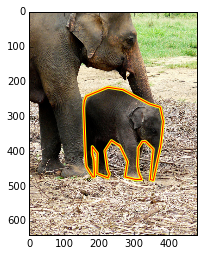

In [15]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print 'ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id'])
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. little elephant
2. baby elephant
3. baby


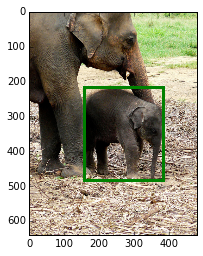

In [16]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [17]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print 'sent_id[%s]: %s' % (sent['sent_id'], sent['sent'])

sent_id[26028]: little elephant
sent_id[26029]: baby elephant
sent_id[26030]: baby
